In [123]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Data pre-processing

In [124]:
data = pd.read_csv("amazon.csv")
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [125]:
#Here we drop the columns that won't be neecessary for statistical conclusions
data.drop(labels = ['img_link', 'product_link', 'about_product', 'review_id','user_name','user_id'], axis = 1, inplace = True)

In [126]:
#Making sure we are well versed wih the data types of all our columns
data.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
review_title           object
review_content         object
dtype: object

In [127]:
#Changing the data type of discounted price and actual price
data['discounted_price'] = data['discounted_price'].str.replace('₹', '').str.replace(',', '').astype(float)
data['actual_price'] = data['actual_price'].str.replace('₹', '').str.replace(',', '')
data['actual_price'] = pd.to_numeric(data['actual_price'])

In [128]:
#Changing datatypes and values in discount percentage
data['discount_percentage'] = data['discount_percentage'].str.replace('%','').str.replace(',','')
data['discount_percentage'] = pd.to_numeric(data['discount_percentage'])
data['discount_percentage'] = data['discount_percentage'] / 100

In [129]:
data.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,0.64,4.2,"24,269","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,0.43,4.0,"43,994","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,0.90,3.9,"7,928","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,0.53,4.2,"94,363","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,0.61,4.2,"16,905","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [130]:
data.dtypes

product_id              object
product_name            object
category                object
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                  object
rating_count            object
review_title            object
review_content          object
dtype: object

In [131]:
data.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,"Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though..."


In [132]:
data['rating'] = data['rating'].str.replace('|', '4.0').astype('float64')

In [133]:
data['rating_count'] = data['rating_count'].str.replace(',','')
data['rating_count'] = pd.to_numeric(data['rating_count'])

In [134]:
data.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
review_title           0
review_content         0
dtype: int64

In [135]:
data['rating_count'] = data['rating_count'].fillna(data['rating_count'].mean())

In [136]:
data.duplicated().sum()

68

In [137]:
data = data.loc[~data.duplicated(subset=['product_name','discounted_price','actual_price','rating'])].reset_index(drop = True)

In [138]:
#Splitting of Categories
category = data['category'].str.split('|', expand=True)
category.head()

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None


In [139]:
#Renaming columns
category = category.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})
#Adding categories to dataset
data['category_1'] = category['category_1']
data['category_2'] = category['category_2']
data.drop(columns='category', inplace=True)
data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,review_title,review_content,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals


In [140]:
#Checking unique values in category_1
data['category_1'].value_counts()

category_1
Electronics              482
Home&Kitchen             448
Computers&Accessories    376
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64

In [141]:
#Checking unique values in category_2
data['category_2'].value_counts()

category_2
Accessories&Peripherals                    308
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       155
Mobiles&Accessories                        147
Heating,Cooling&AirQuality                 116
Headphones,Earbuds&Accessories              63
WearableTechnology                          58
NetworkingDevices                           30
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 12
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Mi

In [142]:
#Removing the whitespaces from product_id
data['product_id'].str.strip().head()

0    B07JW9H4J1
1    B098NS6PVG
2    B096MSW6CT
3    B08HDJ86NZ
4    B08CF3B7N1
Name: product_id, dtype: object

In [143]:
#Splitting the dataset based on Main-Category and Sub-Category, using a pivottable
main_sub = data[['category_1', 'category_2', 'product_id']]
main_sub = main_sub.rename(columns={'category_1' :'Main Category', 'category_2': 'Sub-Category', 'product_id':'Product ID'})
main_sub_table = pd.pivot_table(main_sub, index=['Main Category','Sub-Category'], aggfunc='count')
main_sub_table

Product ID
Main Category         Sub-Category                                       
Car&Motorbike         CarAccessories                                    1
Computers&Accessories Accessories&Peripherals                         308
                      Components                                        5
                      ExternalDevices&DataStorage                      18
                      Laptops                                           1
                      Monitors                                          2
                      NetworkingDevices                                30
                      Printers,Inks&Accessories                        11
                      Tablets                                           1
Electronics           Accessories                                      12
                      Cameras&Photography                              16
                      GeneralPurposeBatteries&BatteryChargers          14
                      Headphones,Earbuds&Accessories                   63
                      HomeAudio                                        16
                      HomeTheater,TV&Video                            155
                      Mobiles&Accessories                             147
                      PowerAccessories                                  1
                      WearableTechnology                               58
Health&PersonalCare   HomeMedicalSupplies&Equipment                     1
Home&Kitchen          CraftMaterials                                    7
                      Heating,Cooling&AirQuality                      116
                      HomeStorage&Organization                         16
                      Kitchen&Dining                                    1
                      Kitchen&HomeAppliances                          308
HomeImprovement       Electrical                                        2
MusicalInstruments    Microphones                                       2
OfficeProducts        OfficeElectronics                                 4
                      OfficePaperProducts                              27
Toys&Games            Arts&Crafts                                       1

In [144]:
#Adding a discount column
data['total_discount'] = data['actual_price'] - data['discounted_price']
data.insert(5, 'total_discount', data.pop('total_discount'))
data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,total_discount,rating,rating_count,review_title,review_content,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,700.0,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,150.0,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,1700.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,370.0,4.2,94363.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,245.0,4.2,16905.0,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals


In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1344 entries, 0 to 1343
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1344 non-null   object 
 1   product_name         1344 non-null   object 
 2   discounted_price     1344 non-null   float64
 3   actual_price         1344 non-null   float64
 4   discount_percentage  1344 non-null   float64
 5   total_discount       1344 non-null   float64
 6   rating               1344 non-null   float64
 7   rating_count         1344 non-null   float64
 8   review_title         1344 non-null   object 
 9   review_content       1344 non-null   object 
 10  category_1           1344 non-null   object 
 11  category_2           1344 non-null   object 
dtypes: float64(6), object(6)
memory usage: 126.1+ KB


In [146]:
data.describe()

,discounted_price,actual_price,discount_percentage,total_discount,rating,rating_count
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,3273.998638,5597.751205,0.466302,2323.752567,4.090923,17701.007502
std,7165.966772,11188.251434,0.215488,4660.336495,0.298182,42342.310913
min,39.000000,39.000000,0.000000,0.000000,2.000000,2.000000
25%,349.000000,899.000000,0.310000,380.000000,3.900000,1095.750000
50%,889.000000,1749.500000,0.490000,800.000000,4.100000,4729.500000
75%,2099.000000,4491.250000,0.620000,1982.750000,4.300000,15982.500000
max,77990.000000,139900.000000,0.940000,61910.000000,5.000000,426973.000000


## Data Analytics

Text(0.5, 1.0, 'Most Products by Main Category')

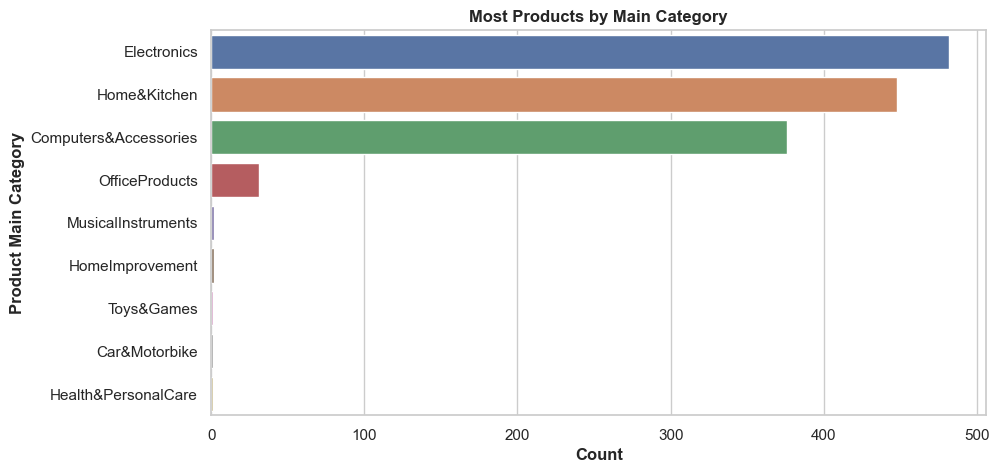

In [147]:
most_main_items = data['category_1'].value_counts().rename_axis('category_1').reset_index(name='counts')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(ax=ax, data=most_main_items, x='counts', y='category_1')
ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Most Products by Main Category', fontweight='bold')

Text(0.5, 1.0, 'Most Products by Sub-Category')

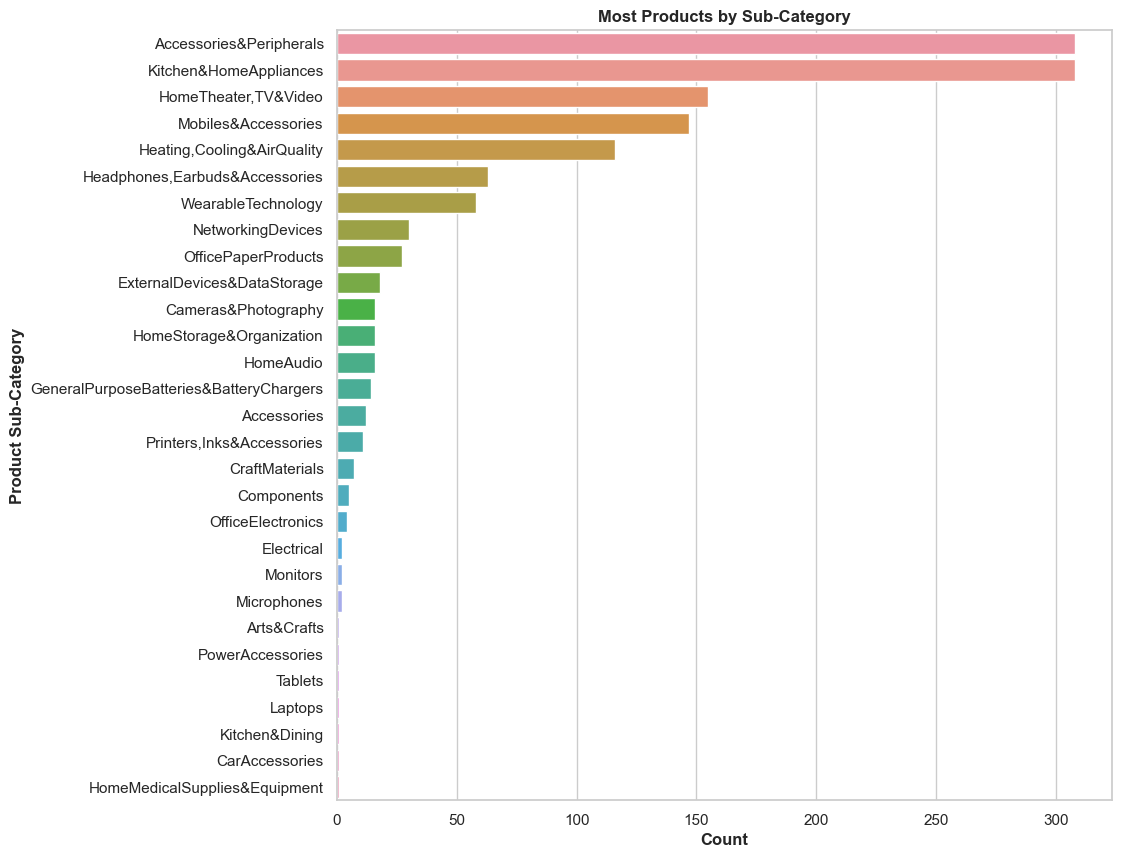

In [148]:
most_sub_items = data['category_2'].value_counts().rename_axis('category_2').reset_index(name='counts')
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(ax=ax, data=most_sub_items, x='counts', y='category_2')
ax.set_xlabel('Count', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Most Products by Sub-Category', fontweight='bold')

Electronics especially acccessories & peripherals and kitchen & home appliances cover most of the products in this dataset.

Text(0.5, 1.0, 'Rating Distribution by Product Main Category')

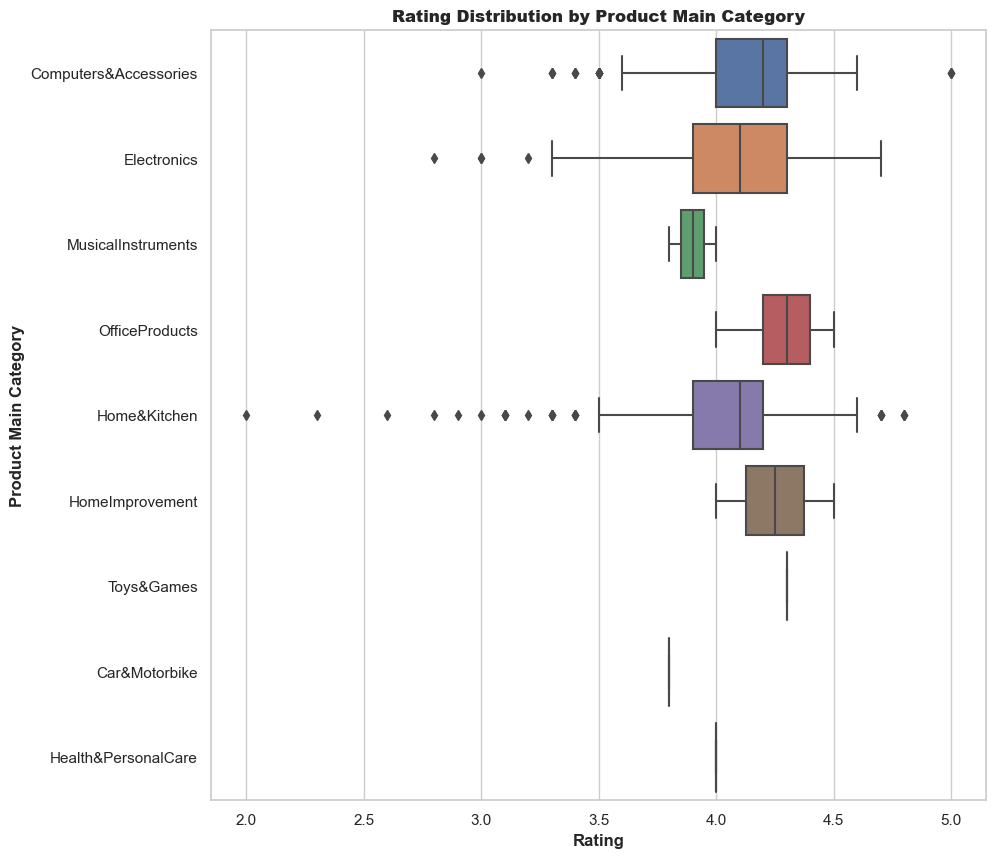

In [149]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(ax=ax, data=data, x='rating', y='category_1')
ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy')

Toys & Games, Car & motorbike, Health & Personal Care product ratings lie in the range of 3.0 - 4.5
Most of the Computers & Accessories and Electronics products have ratings in the range of 3.6 - 4.5, though there are products with ratings as low as 2.5 and products with ratings as high as 5.0
Noticeably, the Home & Kitchen products have a really widespread rating going to as high as 4.75 and going as low as 2.0 rating

Text(0.5, 1.0, 'Rating Distribution by Product Sub-Category')

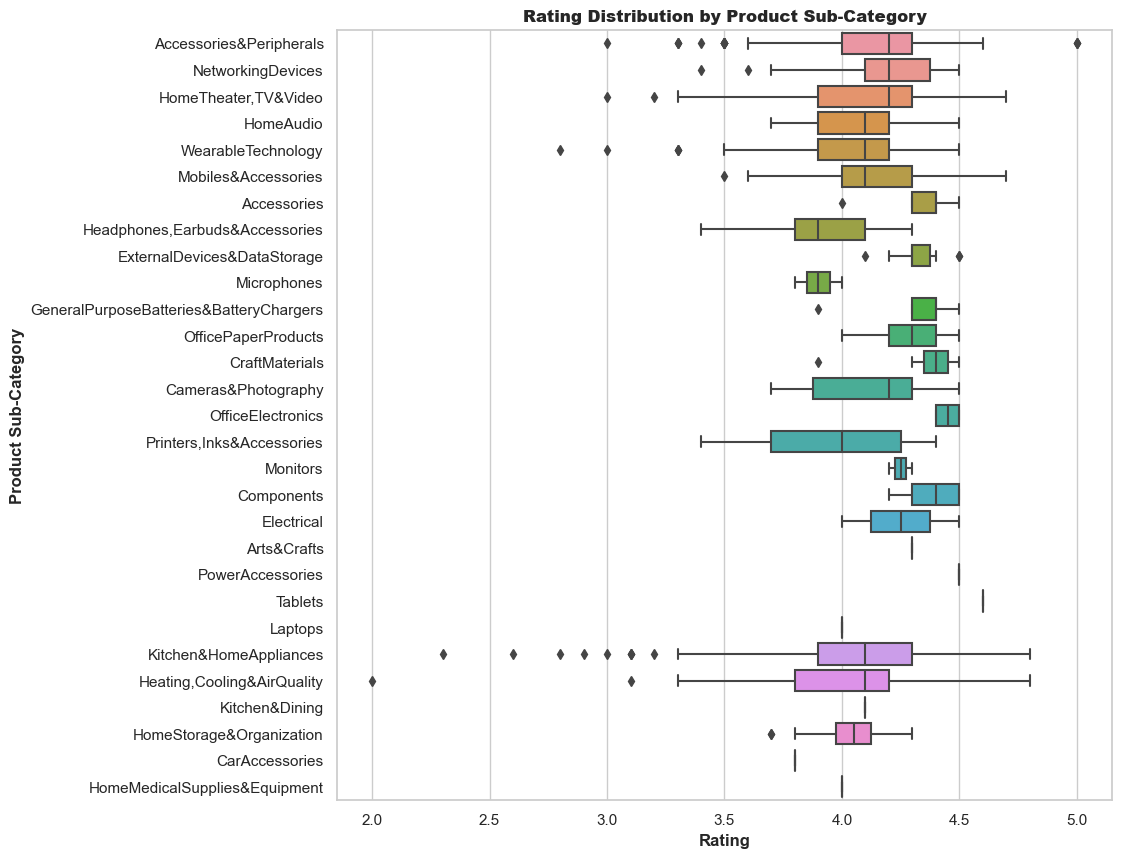

In [150]:
#Rating Distribution by Product Sub-Category (In the form of a box and whisker plot)
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(ax=ax, data=data, x='rating', y='category_2')
ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Sub-Category', fontweight='heavy')

The highest rated product comes from the sub category of Accessories & Peripherals while the lowest rated product comes from the sub category of Heating, Cooling & Air Quality

In [151]:
#Avg discount and median discount based on category
discount_sub = data[['category_1', 'category_2', 'discount_percentage']]
dis_stats = pd.pivot_table(discount_sub, index=['category_1', 'category_2'],aggfunc= ({'discount_percentage': ['count', 'mean', 'median']}))
dis_stats.columns = ['num_discounts', 'avg_discount_percentage','median_discout']
dis_stats

num_discounts  \
category_1            category_2                                               
Car&Motorbike         CarAccessories                                       1   
Computers&Accessories Accessories&Peripherals                            308   
                      Components                                           5   
                      ExternalDevices&DataStorage                         18   
                      Laptops                                              1   
                      Monitors                                             2   
                      NetworkingDevices                                   30   
                      Printers,Inks&Accessories                           11   
                      Tablets                                              1   
Electronics           Accessories                                         12   
                      Cameras&Photography                                 16   
                      GeneralPurposeBatteries&BatteryChargers             14   
                      Headphones,Earbuds&Accessories                      63   
                      HomeAudio                                           16   
                      HomeTheater,TV&Video                               155   
                      Mobiles&Accessories                                147   
                      PowerAccessories                                     1   
                      WearableTechnology                                  58   
Health&PersonalCare   HomeMedicalSupplies&Equipment                        1   
Home&Kitchen          CraftMaterials                                       7   
                      Heating,Cooling&AirQuality                         116   
                      HomeStorage&Organization                            16   
                      Kitchen&Dining                                       1   
                      Kitchen&HomeAppliances                             308   
HomeImprovement       Electrical                                           2   
MusicalInstruments    Microphones                                          2   
OfficeProducts        OfficeElectronics                                    4   
                      OfficePaperProducts                                 27   
Toys&Games            Arts&Crafts                                          1   

                                                               avg_discount_percentage  \
category_1            category_2                                                         
Car&Motorbike         CarAccessories                                          0.420000   
Computers&Accessories Accessories&Peripherals                                 0.555227   
                      Components                                              0.546000   
                      ExternalDevices&DataStorage                             0.468889   
                      Laptops                                                 0.380000   
                      Monitors                                                0.505000   
                      NetworkingDevices                                       0.472000   
                      Printers,Inks&Accessories                               0.215455   
                      Tablets                                                 0.290000   
Electronics           Accessories                                             0.574167   
                      Cameras&Photography                                     0.475625   
                      GeneralPurposeBatteries&BatteryChargers                 0.167143   
                      Headphones,Earbuds&Accessories                          0.594921   
                      HomeAudio                                               0.496875   
                      HomeTheater,TV&Video                                    0.493871   
                      Mobiles&Accessories           

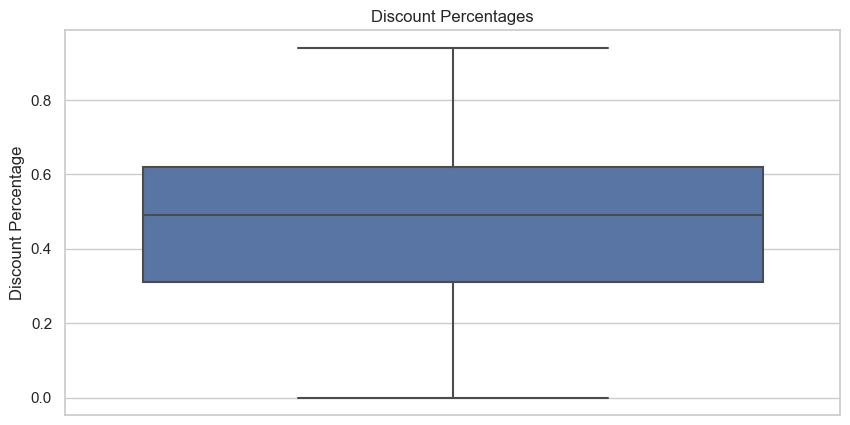

In [152]:
#Boxplot for discount percentages
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, y='discount_percentage')
plt.title('Discount Percentages')
plt.ylabel('Discount Percentage')
plt.show()

Text(0.5, 1.0, 'Discount Percentage Distribution')

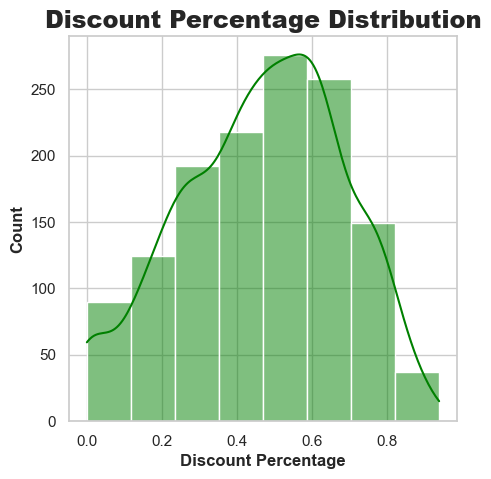

In [153]:
#Distribution of discount percentage using a histogram
disc_hist = sns.histplot(data=data, x='discount_percentage', bins=8, kde=True,color='green')
disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy',size='x-large')

Most products in the dataset have a discount ranging from 50-70%

Text(0.5, 1.0, 'Correlation Heatmap')

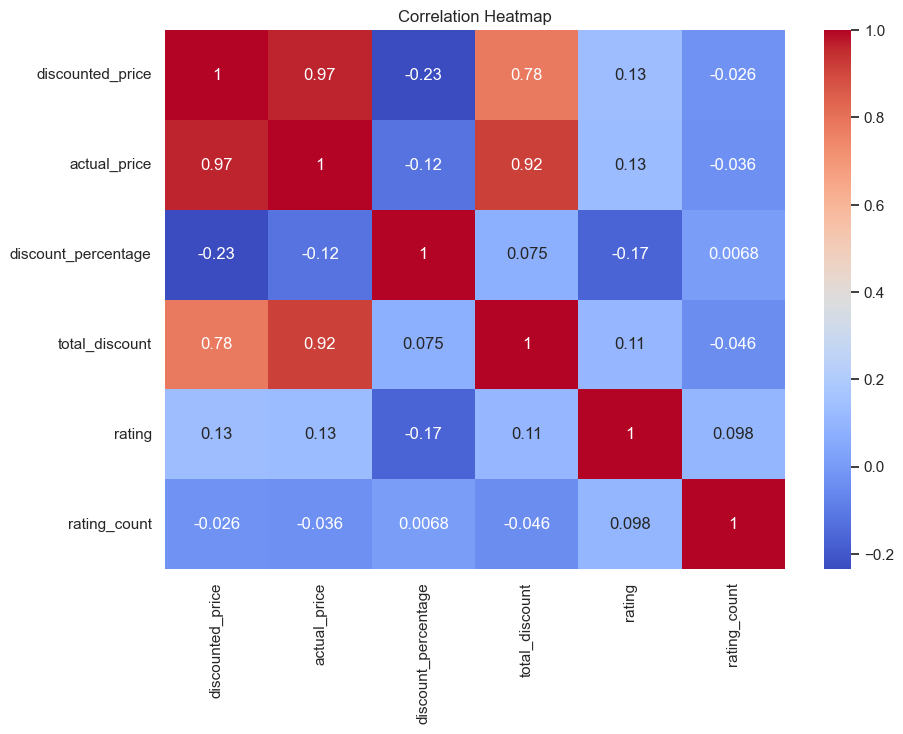

In [154]:
#Correlation heatmap between different variables
numeric_data = data.select_dtypes(include=np.number)
plt.figure(figsize=(10,7))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')

Text(0, 0.5, 'Discounted Price')

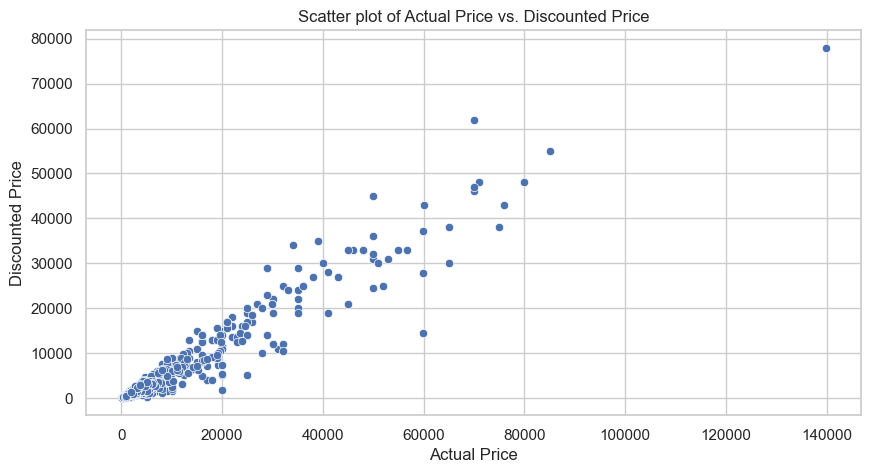

In [155]:
#Scatter plot between actual price vs discounted price
plt.figure(figsize=(10,5))
sns.scatterplot(x='actual_price', y='discounted_price', data=data)
plt.title('Scatter plot of Actual Price vs. Discounted Price')
plt.xlabel('Actual Price')
plt.ylabel('Discounted Price')

The actual prices of the products and their discounted prices have a positive correlation

Text(0, 0.5, 'Ratings')

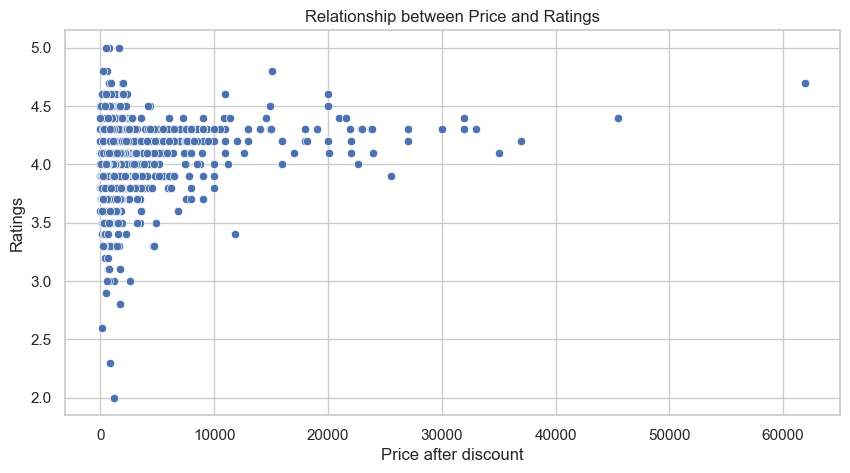

In [156]:
#Relationship between Price and Ratings
plt.figure(figsize=(10, 5))
sns.scatterplot(x='total_discount', y='rating', data=data)
plt.title('Relationship between Price and Ratings')
plt.xlabel('Price after discount')
plt.ylabel('Ratings')

Text(0.5, 0, 'Ratings')

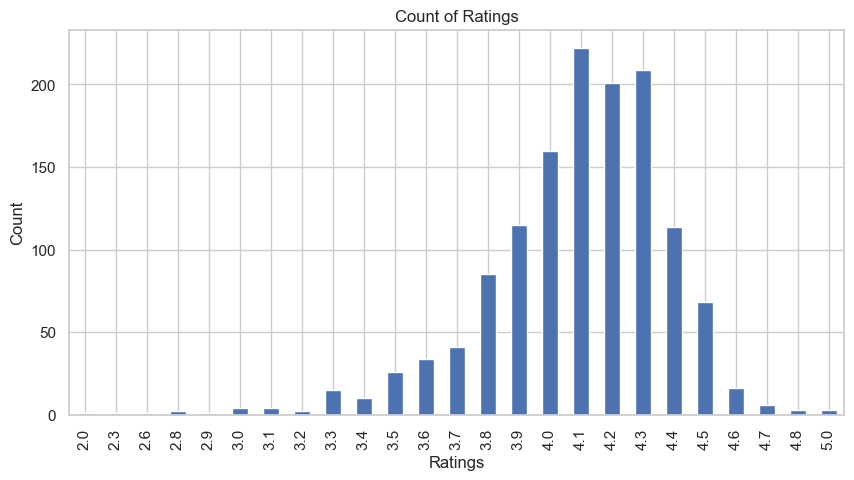

In [157]:
#Bar plot to show count of ratings
ax = data['rating'].value_counts().sort_index().plot(kind='bar', title='Count of Ratings', figsize=(10, 5))
ax.set_ylabel('Count')
ax.set_xlabel('Ratings')

The bar graph above suggests that most ratings lie within the range of 3.9 and 4.4, suggesting that most customers are satisfied with their products

## Sentiment Analysis 

In [158]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import WordNetLemmatizer
nltk.download('stopwords')
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer

[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10060] A connection attempt failed because the
[nltk_data]     connected party did not properly respond after a
[nltk_data]     period of time, or established connection failed
[nltk_data]     because connected host has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


In [159]:
#Running the polarity score on the entire dataset
reviews = data[['product_id','review_title','review_content']]
res = {}
for i, row in reviews.iterrows():
    review_desc =row['review_content']
    myid = row['product_id']
    res[myid] = SentimentIntensityAnalyzer().polarity_scores(review_desc)

In [160]:
# Converting res array to dataframe and printing result
score = pd.DataFrame(res).T
score = score.reset_index().rename(columns={'index' : 'product_id'})
score.head()

,product_id,neg,neu,pos,compound
0,B07JW9H4J1,0.032,0.744,0.224,0.9033
1,B098NS6PVG,0.010,0.821,0.169,0.9853
2,B096MSW6CT,0.000,0.641,0.359,0.6808
3,B08HDJ86NZ,0.028,0.800,0.172,0.8316
4,B08CF3B7N1,0.116,0.719,0.165,0.9809


In [161]:
# Adding the score column into the main dataset
data = data.merge(score)
data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,total_discount,rating,rating_count,review_title,review_content,category_1,category_2,neg,neu,pos,compound
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,700.0,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,0.032,0.744,0.224,0.9033
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,150.0,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,0.010,0.821,0.169,0.9853
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,1700.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,0.000,0.641,0.359,0.6808
3,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,999.0,0.80,800.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,0.000,0.641,0.359,0.6808
4,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,370.0,4.2,94363.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,0.028,0.800,0.172,0.8316


In [162]:
#Creating Categories for Rankings
rating_score = []
for score in data['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')
data['rating_score'] = rating_score
data['rating_score'] = data['rating_score'].astype('category')
data['rating_score'] = data['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)
data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,total_discount,rating,rating_count,review_title,review_content,category_1,category_2,neg,neu,pos,compound,rating_score
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,700.0,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,0.032,0.744,0.224,0.9033,Above Average
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,150.0,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,0.010,0.821,0.169,0.9853,Above Average
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,1700.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,0.000,0.641,0.359,0.6808,Average
3,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,999.0,0.80,800.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,0.000,0.641,0.359,0.6808,Average
4,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,370.0,4.2,94363.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,0.028,0.800,0.172,0.8316,Above Average


<Axes: title={'center': 'Negative'}, xlabel='rating_score', ylabel='neg'>

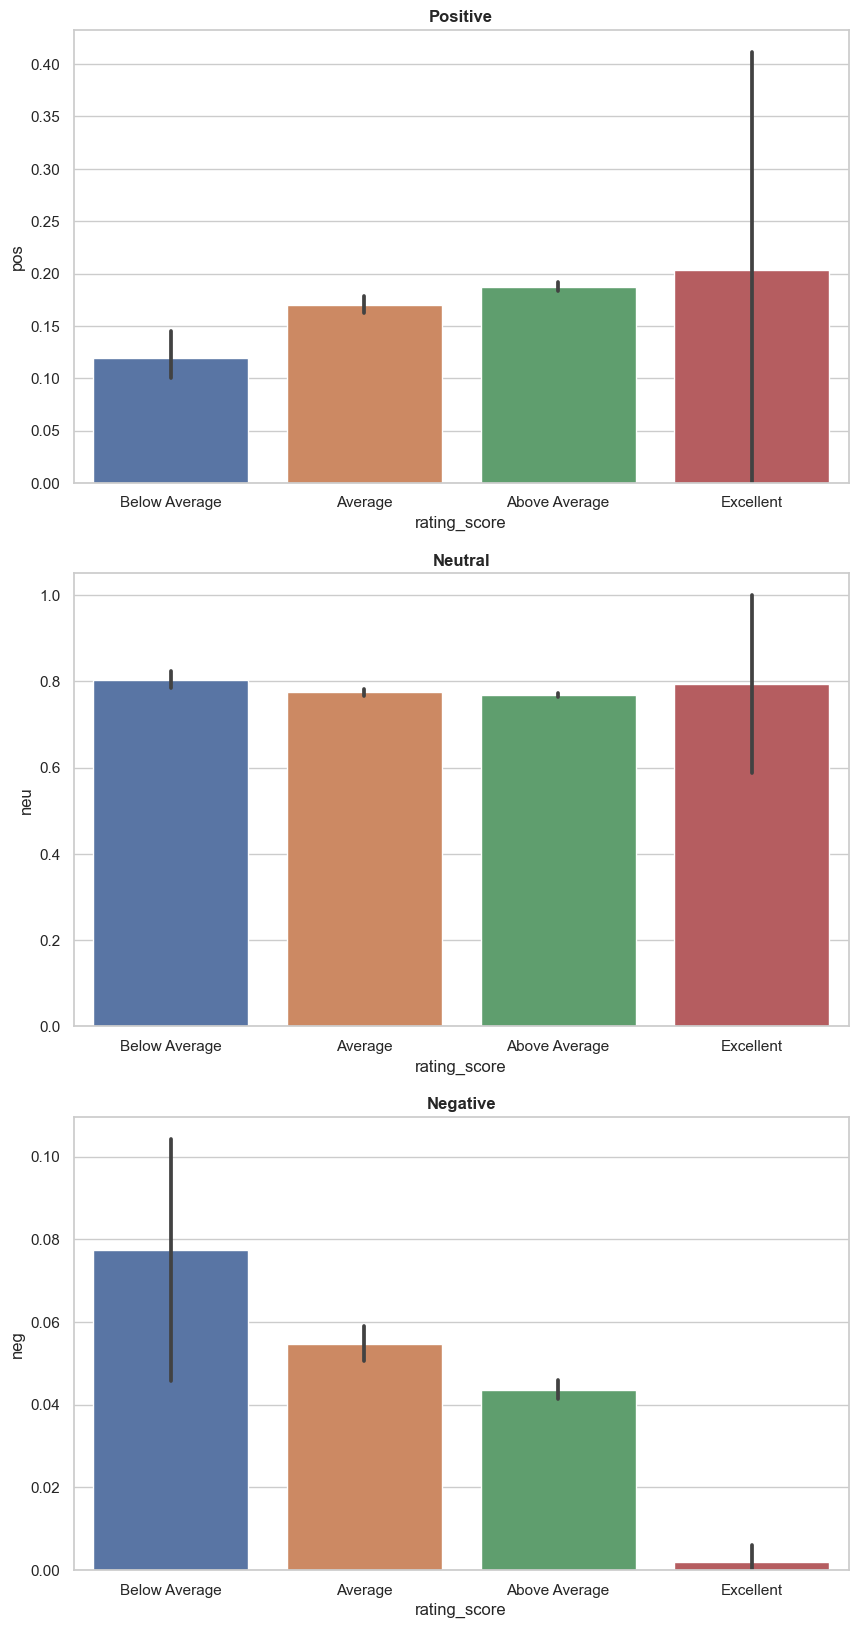

In [163]:
# Displaying box plots based on the rating score
fig, ax = plt.subplots(3,1, figsize=(10,20))
ax[0].set_title('Positive', fontweight = 'bold')
ax[1].set_title('Neutral', fontweight = 'bold')
ax[2].set_title('Negative', fontweight = 'bold')
sns.barplot(data=data, x='rating_score', y='pos', ax=ax[0])
sns.barplot(data=data, x='rating_score', y='neu', ax=ax[1])
sns.barplot(data=data, x='rating_score', y='neg', ax=ax[2])

Evidently, the amount of positive words being used in reviews as the rating goes up increases

The amount of negative words being used in reviews as the rating goes up drastically decreases

In [164]:
data[['pos','neu','neg','compound']].describe()

,pos,neu,neg,compound
count,1344.000000,1344.000000,1344.000000,1344.000000
mean,0.182688,0.770872,0.046446,0.813185
std,0.074739,0.072218,0.038396,0.376297
min,0.000000,0.465000,0.000000,-0.982100
25%,0.131000,0.727000,0.020000,0.861500
50%,0.173000,0.780000,0.042000,0.960100
75%,0.225250,0.820000,0.065000,0.988300
max,0.500000,1.000000,0.413000,0.999900


## Sentiment Analysis using Machine Learning

In [165]:
#Making a function to categorize ratings
def score_round(x):
    if x>=5:
        return 2
    elif x>=3:
        return 1
    else:
        return 0

In [166]:
#Applying the function into the dataset
data['Score_New']=data['rating'].apply(score_round)
data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,total_discount,rating,rating_count,review_title,review_content,category_1,category_2,neg,neu,pos,compound,rating_score,Score_New
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,700.0,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,0.032,0.744,0.224,0.9033,Above Average,1
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,150.0,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,0.010,0.821,0.169,0.9853,Above Average,1
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,1700.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,0.000,0.641,0.359,0.6808,Average,1
3,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,999.0,0.80,800.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,0.000,0.641,0.359,0.6808,Average,1
4,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,370.0,4.2,94363.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,0.028,0.800,0.172,0.8316,Above Average,1


In [167]:
data.Score_New.value_counts()

Score_New
1    1335
0       6
2       3
Name: count, dtype: int64

(-0.5, 999.5, 599.5, -0.5)

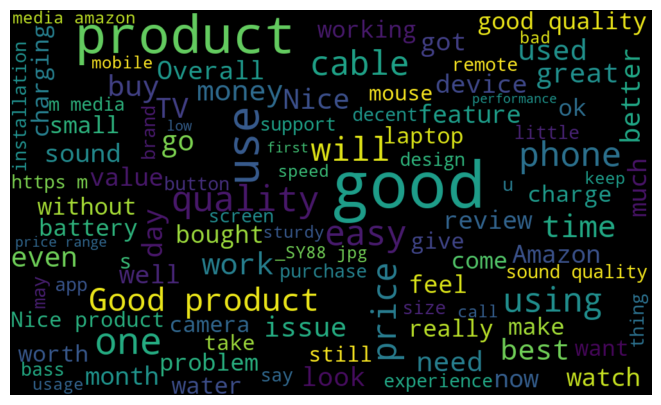

In [168]:
#Making a word cloud of all the review_content values
txt = ' '.join(rev for rev in data['review_content'])
plt.figure(figsize=(15,5))
wordcloud = WordCloud(
background_color = 'black',
max_font_size = 100,
max_words = 100,
width = 1000,
height = 600
).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

(-0.5, 999.5, 599.5, -0.5)

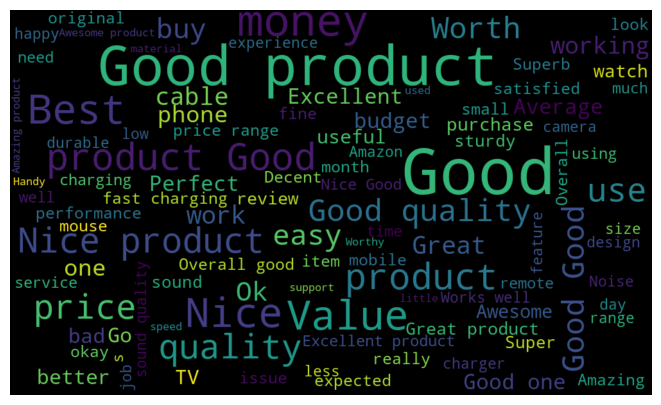

In [169]:
#Making a word cloud of all the review_title values
txt = ' '.join(rev for rev in data['review_title'])
plt.figure(figsize=(15,5))
wordcloud = WordCloud(
background_color = 'black',
max_font_size = 100,
max_words = 100,
width = 1000,
height = 600
).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

In [170]:
# Storing all the positive reviews, using a loop
positive = {}
j = 0
for i, row in data[['Score_New','review_title']].iterrows():
    if row['Score_New'] == 2:
        positive[j] = row['review_title']
        j = j+1

(-0.5, 799.5, 499.5, -0.5)

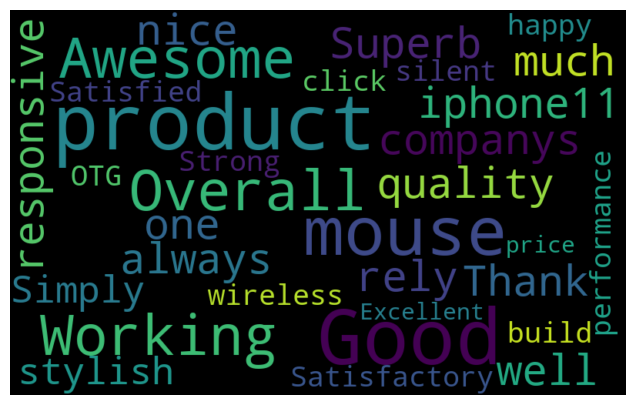

In [171]:
#Making a word Cloud of Positive Reviews
txt = ' '.join(positive[i] for i in positive)
plt.figure(figsize=(15,5))
wordcloud = WordCloud(
background_color = 'black',
max_font_size = 100,
max_words = 100,
width = 800,
height = 500
).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

In [172]:
# Storing all the neutral reviews, using a loop
neutral = {}
j = 0
for i, row in data[['Score_New','review_title']].iterrows():
    if row['Score_New'] == 1:
        neutral[j] = row['review_title']
        j = j+1

(-0.5, 799.5, 499.5, -0.5)

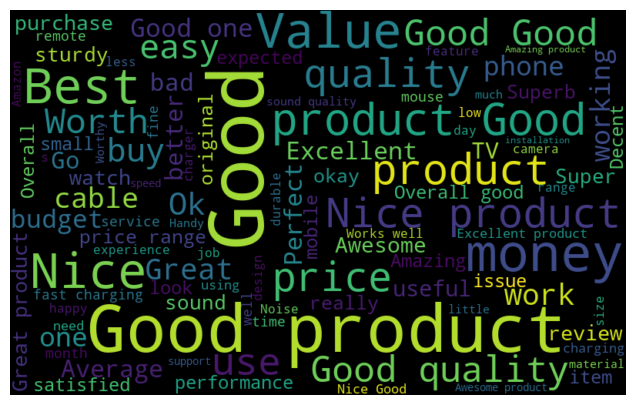

In [173]:
#Making a word Cloud of Neutral Reviews
txt = ' '.join(neutral[i] for i in neutral)
plt.figure(figsize=(15,5))
wordcloud = WordCloud(
background_color = 'black',
max_font_size = 100,
max_words = 100,
width = 800,
height = 500
).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

In [174]:
#Storing all the negative reviews, using a loop
negative = {}
j = 0
for i, row in data[['Score_New','review_title']].iterrows():
    if row['Score_New'] == 0:
        negative[j] = row['review_title']
        j = j+1

(-0.5, 799.5, 499.5, -0.5)

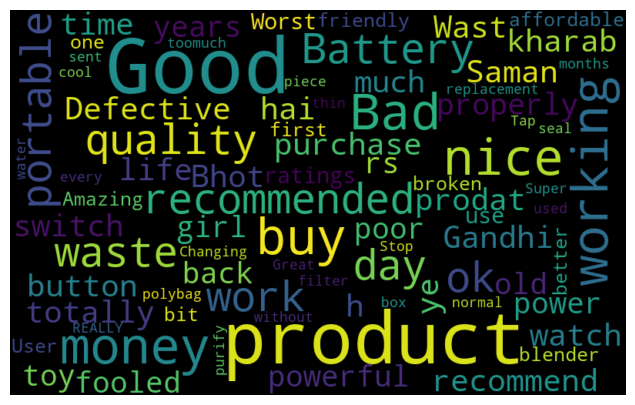

In [175]:
#Making a word Cloud of Negative Reviews
txt = ' '.join(negative[i] for i in negative)
plt.figure(figsize=(15,5))
wordcloud = WordCloud(
background_color = 'black',
max_font_size = 100,
max_words = 100,
width = 800,
height = 500
).generate(txt)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')

In [176]:
#Assigning values to ratings
mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
# Convert the values in a specific column
column_to_convert = 'Score_New'
data['Score_New'] = data[column_to_convert].map(mapping)

data.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,total_discount,rating,rating_count,review_title,review_content,category_1,category_2,neg,neu,pos,compound,rating_score,Score_New
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,700.0,4.2,24269.0,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,0.032,0.744,0.224,0.9033,Above Average,Neutral
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,150.0,4.0,43994.0,"A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,0.010,0.821,0.169,0.9853,Above Average,Neutral
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,1700.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,0.000,0.641,0.359,0.6808,Average,Neutral
3,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,999.0,0.80,800.0,3.9,7928.0,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,0.000,0.641,0.359,0.6808,Average,Neutral
4,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,370.0,4.2,94363.0,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,0.028,0.800,0.172,0.8316,Above Average,Neutral


<Axes: xlabel='Score_New', ylabel='count'>

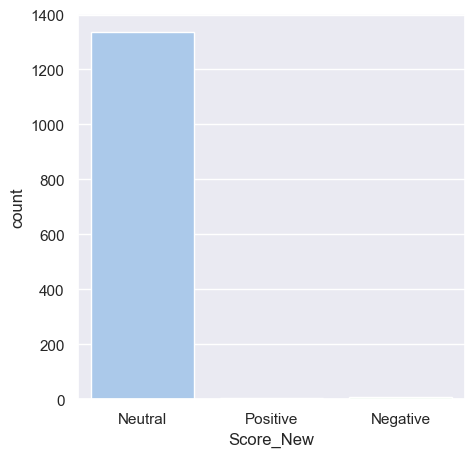

In [177]:
#Plotting a vertical bar graph to display value counts of review categories
sns.set_theme(style='whitegrid')
sns.set(rc = {'figure.figsize':(5,5)})
sns.set_palette("pastel")
sns.countplot(x='Score_New',data=data)

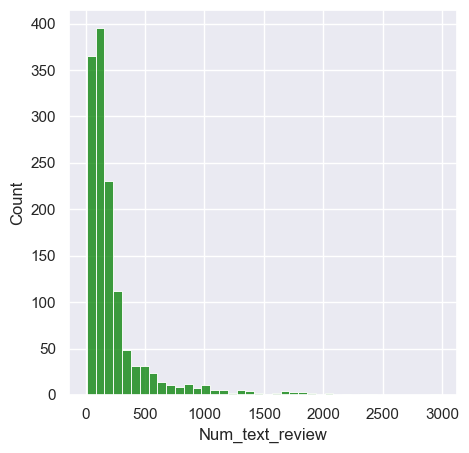

In [178]:
# Making additional columns for length of review_content and review_title, to plot a histogram for the same
data['Num_text_review'] = data['review_content'].apply(lambda x:len(str(x).split()))
data['Num_summary_review'] = data['review_title'].apply(lambda x:len(str(x).split()))
sns.histplot(data=data, x="Num_text_review",bins=40,color='green')
sns.set(rc = {'figure.figsize':(5,5)})

<Axes: xlabel='Num_summary_review', ylabel='Count'>

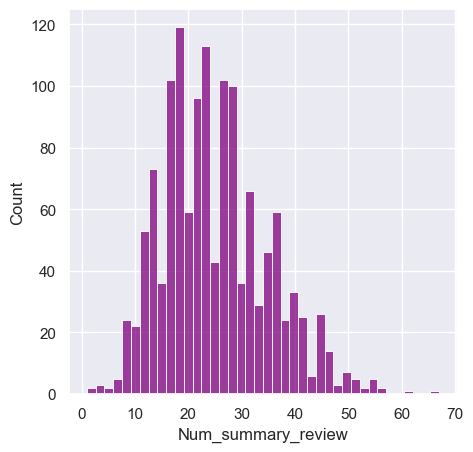

In [179]:
sns.histplot(data= data, x="Num_summary_review",bins=40,color='purple')

In [180]:
import re
from collections import Counter
pd.options.display.max_rows = None

In [181]:
#Function to remove hyperlinks and markup
def clean(raw):
# """ Remove hyperlinks and markup """
    result = re.sub("<[a][^>]*>(.+?)</[a]>", 'Link.', raw)
    result = re.sub('&gt;', "", result)
    result = re.sub('&#x27;', "'", result)
    result = re.sub('&quot;', '"', result)
    result = re.sub('&#x2F;', ' ', result)
    result = re.sub('<p>', ' ', result)
    result = re.sub('</i>', '', result)
    result = re.sub('&#62;', '', result)
    result = re.sub('<i>', ' ', result)
    result = re.sub("\n", '', result)
    return result

In [182]:
#Function to remove numbers from text
def remove_num(texts):
    output = re.sub(r'\d+', '', texts)
    return output

In [183]:
# Function to remove consecutive white spaces between words
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string

In [184]:
# Function to remove symbols from the dataset
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9?!.,]+", ' ', x)
    return cleaned_string

In [185]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F" # emoticons
        u"\U0001F300-\U0001F5FF" # symbols & pictographs
        u"\U0001F680-\U0001F6FF" # transport & map symbols
        u"\U0001F1E0-\U0001F1FF" # flags (iOS)
            "]+", flags = re.UNICODE)   
    return regrex_pattern.sub(r'', x)

In [186]:
# Function to remove all punctuation
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":", "!",'"',','))
    return final

In [187]:
#Function to remove stopwords
stop=set(stopwords.words("english"))
stemmer=PorterStemmer()
lemma=WordNetLemmatizer()
def remove_stopword(text):
    text=[word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(text)

In [188]:
#Function to stem words to their core meaning, i.e. converting unnecessarily long words into their base form
# Eg: Running becomes Run
def Stemming(text):
    stem=[]
    stopword = stopwords.words('english')
    snowball_stemmer = SnowballStemmer('english')
    word_tokens = nltk.word_tokenize(text)
    stemmed_word = [snowball_stemmer.stem(word) for word in word_tokens]
    stem=' '.join(stemmed_word)
    return stem

In [189]:
# Function to run all the functions above
def cleaning(df,review):
    df[review] = df[review].apply(clean)
    df[review] = df[review].apply(deEmojify)
    df[review] = df[review].str.lower()
    df[review] = df[review].apply(remove_num)
    df[review] = df[review].apply(remove_symbols)
    df[review] = df[review].apply(remove_punctuation)
    df[review] = df[review].apply(remove_stopword)
    df[review] = df[review].apply(unify_whitespaces)
    df[review] = df[review].apply(Stemming)

In [190]:
# Counting the frequency of each word used in the reviews
data['temp_list'] = data['review_content'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,10506
1,is,8914
2,and,8284
3,to,7104
4,for,5728
5,a,5259
6,it,5106
7,of,4051
8,I,4041
9,in,3482


<Axes: xlabel='count', ylabel='Common_words'>

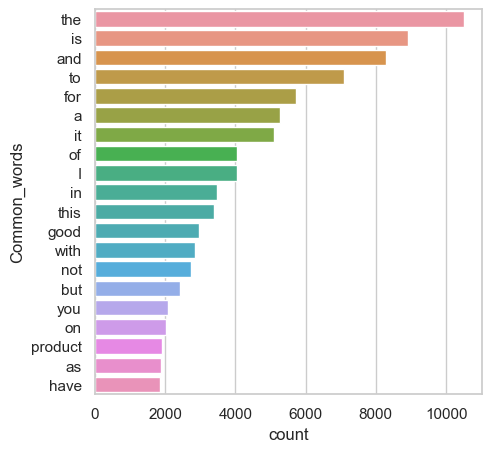

In [191]:
sns.set_theme(style="whitegrid")
sns.barplot(x="count", y="Common_words", data=temp)

## TRAINING AN ML MODEL TO CLASSIFY REVIEWS

In [216]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import f1_score,roc_auc_score

In [203]:
vectorizer = CountVectorizer(token_pattern=r'\b\w+\b')
x = vectorizer.fit_transform(data['review_content'])
y = data['Score_New']

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

In [205]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [206]:
predictions = lr.predict(x_test)

In [207]:
new = np.asarray(y_test)
confusion_matrix(y_test,predictions)

array([[  0,   2],
       [  0, 200]], dtype=int64)

In [208]:
labels = {'Neutral': 0 , 'Positive' : 1, 'Negative': 2}
label = lambda x: labels[x]

In [209]:
def Confusion_Matrix(y_test,ypred):
    cfmat = confusion_matrix(y_test, ypred)
    print('Confusion Matrix: \n',classification_report(y_test,ypred,zero_division=1, labels = np.unique(ypred)))
    print("\n")
    print(f'TN - True Negative {cfmat[1,1]}')
    print(f'FP - False Positive {cfmat[1,0]}')
    print(f'FN - False Negative {cfmat[0,1]}')
    print(f'TP - True Positive {cfmat[0,0]}')
    print(f'Accuracy Rate: {np.divide(np.sum([cfmat[0,0],cfmat[1,1]]),np.sum(cfmat))}')
    print(f'Misclassification Rate: {np.divide(np.sum([cfmat[0,1],cfmat[1,0]]),np.sum(cfmat))}')
    print(f'F1-Score: {f1_score(y_test, ypred,average="macro")}')
    predictions = lr.predict_proba(x_test)
    y_test1 = list(map(label,y_test))
    print(f'ROC-AUC {roc_auc_score(y_test1, predictions, multi_class = "ovo",labels = [0,1,2])}')

In [210]:
Confusion_Matrix(y_test,predictions)

Confusion Matrix: 
               precision    recall  f1-score   support

     Neutral       0.99      1.00      1.00       200

   micro avg       0.99      1.00      1.00       200
   macro avg       0.99      1.00      1.00       200
weighted avg       0.99      1.00      1.00       200



TN - True Negative 200
FP - False Positive 0
FN - False Negative 2
TP - True Positive 0
Accuracy Rate: 0.9900990099009901
Misclassification Rate: 0.009900990099009901
F1-Score: 0.4975124378109453
ROC-AUC 0.48375


The F1-score, which considers both precision and recall, is approximately 0.50. This score is relatively low, suggesting that the model's performance may be imbalanced or skewed due to the class distribution or other factors.

The ROC-AUC score is approximately 0.48, indicating that the model's ability to discriminate between classes is relatively low. This suggests that the model may have difficulty distinguishing between different classes, and the predictions may not be highly reliable or accurate.

Overall, the model shows good accuracy and precision in predicting the 'Neutral' class. However, the low F1-score and ROC-AUC score indicate that the model's performance may be limited, particularly in discriminating between different classes. Further analysis and investigation are recommended to understand the underlying reasons for these results and to potentially improve the model's performance.

In [211]:
from sklearn.ensemble import RandomForestClassifier

In [212]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [213]:
prediction = rfc.predict(x_test)

In [214]:
new_ = np.asarray(y_test)
confusion_matrix(y_test,prediction)

array([[  0,   2],
       [  0, 200]], dtype=int64)

In [215]:
Confusion_Matrix(y_test,prediction)

Confusion Matrix: 
               precision    recall  f1-score   support

     Neutral       0.99      1.00      1.00       200

   micro avg       0.99      1.00      1.00       200
   macro avg       0.99      1.00      1.00       200
weighted avg       0.99      1.00      1.00       200



TN - True Negative 200
FP - False Positive 0
FN - False Negative 2
TP - True Positive 0
Accuracy Rate: 0.9900990099009901
Misclassification Rate: 0.009900990099009901
F1-Score: 0.4975124378109453
ROC-AUC 0.48375
